In [87]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

% matplotlib inline

# Load data

In [207]:
data = pd.read_csv("data/full_dataset.csv")
features, targets = data.drop(["FELONY", "MISDEMEANOR", "VIOLATION", "FELONY_perc", "MISDEMEANOR_perc", "VIOLATION_perc"], axis=1), data["FELONY_perc"]

# KMeans

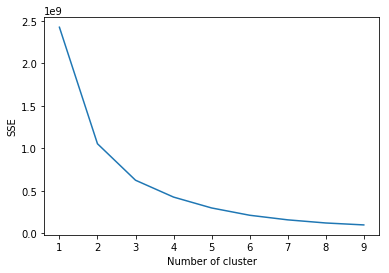

In [191]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(features)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Elbow at k=3

In [194]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters).fit(features)

print("{} crimes on average overall".format(targets.mean()))
cluster_features = pd.DataFrame()

for c in range(n_clusters):
    print("{} crimes on average for cluster {}".format(targets.ix[kmeans.labels_ == c].mean(), c))
    cluster_features["mean_cluster_{}".format(c)] = features.ix[kmeans.labels_ == c].mean(axis=0)
    cluster_features["std_cluster_{}".format(c)] = features.ix[kmeans.labels_ == c].std(axis=0)
    cluster_features["CI_inf_cluster_{}".format(c)] = cluster_features["mean_cluster_{}".format(c)] - cluster_features["std_cluster_{}".format(c)]
    cluster_features["CI_sup_cluster_{}".format(c)] = cluster_features["mean_cluster_{}".format(c)] + cluster_features["std_cluster_{}".format(c)]

FELONY    23.100828
dtype: float64 crimes on average overall
FELONY    20.430258
dtype: float64 crimes on average for cluster 0
FELONY    29.363842
dtype: float64 crimes on average for cluster 1


In [195]:
cluster_features

,mean_cluster_0,std_cluster_0,CI_inf_cluster_0,CI_sup_cluster_0,mean_cluster_1,std_cluster_1,CI_inf_cluster_1,CI_sup_cluster_1
No schooling completed,0.026932,0.035124,-0.008192,0.062056,0.032180,0.032462,-0.000283,0.064642
Nursery school,0.000259,0.002569,-0.002310,0.002828,0.000273,0.001909,-0.001636,0.002182
Kindergarten,0.000381,0.003530,-0.003149,0.003910,0.000540,0.003103,-0.002563,0.003643
1st grade,0.001033,0.006335,-0.005302,0.007368,0.001300,0.005378,-0.004077,0.006678
2nd grade,0.002453,0.009663,-0.007210,0.012115,0.002842,0.008718,-0.005876,0.011560
3rd grade,0.004830,0.014725,-0.009895,0.019556,0.006325,0.013093,-0.006769,0.019418
4th grade,0.004485,0.012921,-0.008435,0.017406,0.005710,0.011593,-0.005883,0.017303
5th grade,0.008675,0.019849,-0.011173,0.028524,0.009799,0.015742,-0.005943,0.025540
6th grade,0.018932,0.032076,-0.013143,0.051008,0.025258,0.037543,-0.012284,0.062801
7th grade,0.007276,0.017547,-0.010271,0.024824,0.008308,0.013981,-0.005674,0.022289


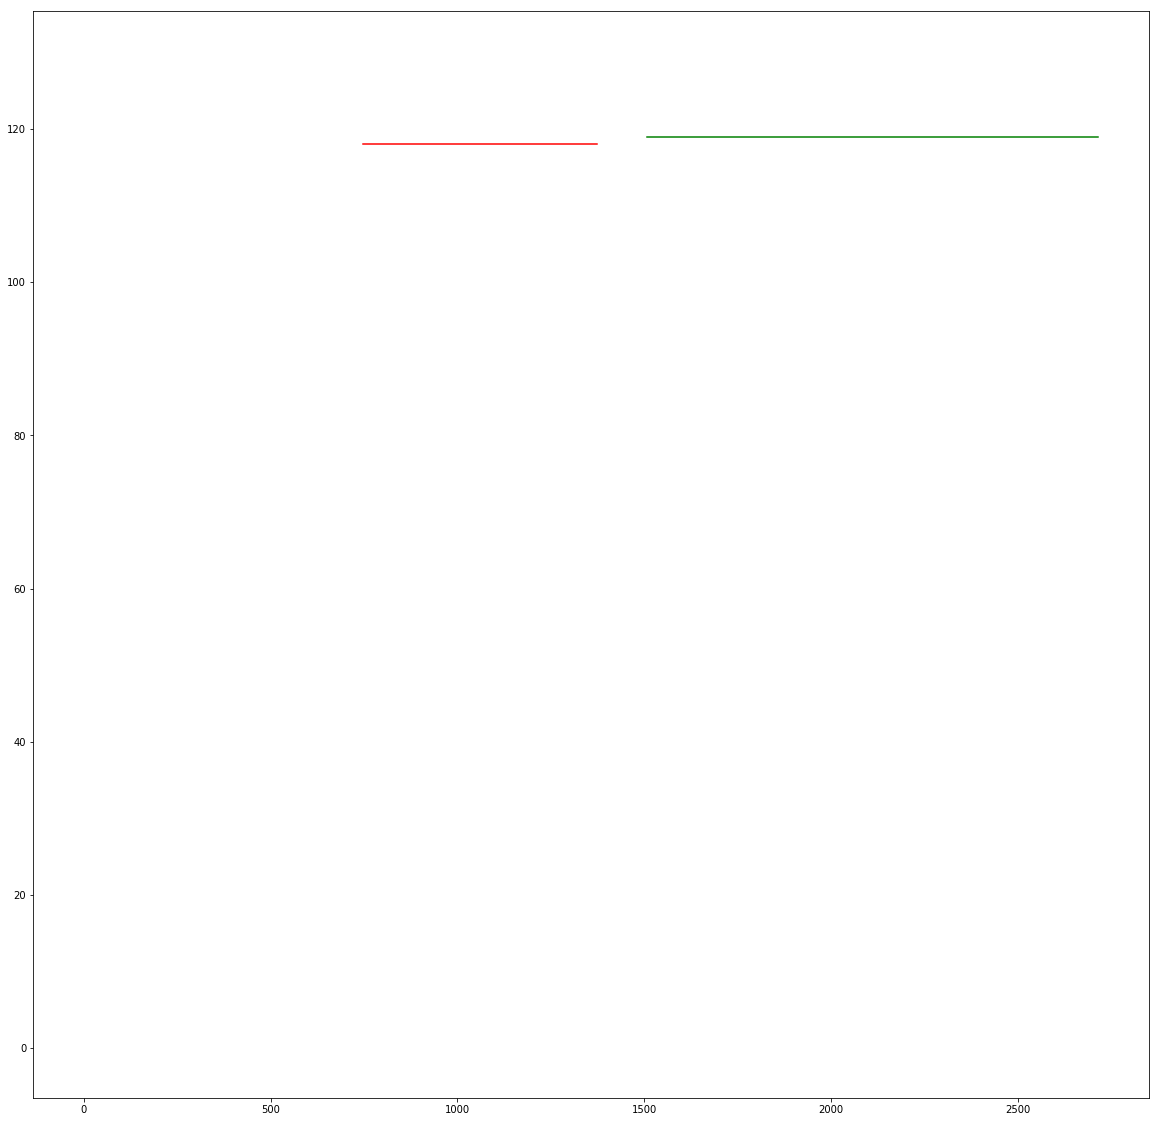

In [197]:
plt.figure(figsize=(20,20))
colors = ['r', 'g', 'b']
for h, c in enumerate(cluster_features.index):
    for i in range(n_clusters):
        plt.plot([cluster_features["CI_inf_cluster_{}".format(i)][c], 
                  cluster_features["CI_sup_cluster_{}".format(i)][c]], 
                 [h+i, h+i],
                color=colors[i])

# PCA

In [162]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [198]:
pca = PCA(n_components=2)
scaled_features = StandardScaler().fit_transform(features)
principal_components = pca.fit_transform(scaled_features)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bedf3c8>]],
      dtype=object)

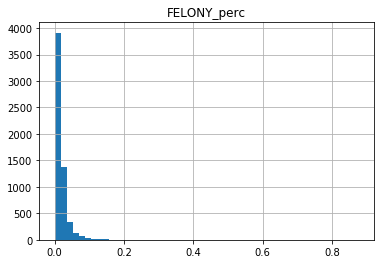

In [205]:
targets[targets < 1].hist(bins=50)

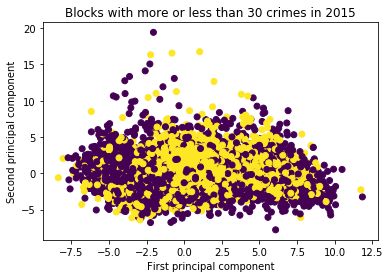

In [204]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=targets < 0.01)
plt.title("Blocks with more or less than 30 crimes in 2015")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.savefig("pca.png")

## pca.explained_variance_

In [208]:
print(principal_components[(targets < 0.01)].mean(), principal_components[(targets >= 0.01)].mean())
print(principal_components[(targets < 0.01)].std(), principal_components[(targets >= 0.01)].std())

0.36527646287115223 -0.2183182313166762
2.7893768816121236 3.1027435996414447


<Container object of 129 artists>

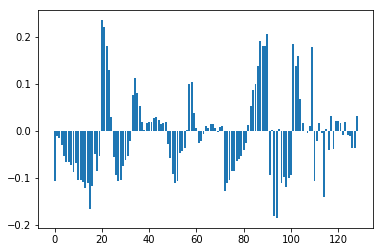

In [209]:
plt.bar(range(pca.components_.shape[1]), pca.components_[0])

In [210]:
l = list(zip(features.columns[pca.components_[0].argsort()[-10:]], pca.components_[0][pca.components_[0].argsort()[-10:]]))
l.reverse()
l

[("Bachelor's degree", 0.23545231859941917),
 ("Master's degree", 0.22206020278977537),
 ('In labor force: - Civilian labor force: - Employed', 0.20646622722381816),
 ('$200,000 or more', 0.19121805482680776),
 ('Nonfamily households:', 0.1858510748977067),
 ('In labor force:', 0.1815543891838136),
 ('In labor force: - Civilian labor force:', 0.18154831338781008),
 ('Professional school degree', 0.17991327937657112),
 ('White alone', 0.178346343285646),
 ('Nonfamily households: - 2-person household', 0.15962515857018886)]

In [211]:
l = list(zip(features.columns[(-pca.components_[0]).argsort()[-10:]], pca.components_[0][(-pca.components_[0]).argsort()[-10:]]))
l.reverse()
l

[('Family households:', -0.18585107489770666),
 ('Not in labor force', -0.18155438918381356),
 ('Regular high school diploma', -0.16657356725862335),
 ('Some other race alone', -0.1418077919749483),
 ('Less than $10,000', -0.12805270763713034),
 ('11th grade', -0.12248981834511859),
 ('Family households: - 5-person household', -0.1204561228242306),
 ('GED or alternative credential', -0.11781577215194601),
 ('$10,000 to $14,999', -0.11214273320216164),
 ('12th grade, no diploma', -0.11090866364361668)]